In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("lightning.qubit", wires = 1)

@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta, wires=0)
    
    return qml.expval(qml.PauliZ(0))

circuit(0.1)

array(-0.99500417)

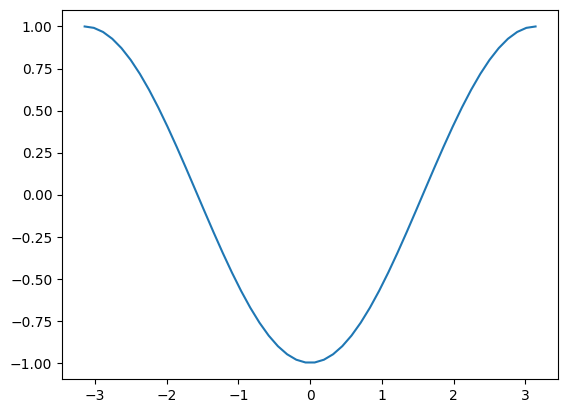

In [2]:
thetas = np.linspace(-np.pi, np.pi, 50)
measurements = []

for i in thetas:
    measurements.append(circuit(i))
    # append circuit(thetas) as elements of arrary(measurements)
    
    
fig, ax = plt.subplots()
ax.plot(thetas, measurements)

In [18]:
theta = np.array([-2], requires_grad = True)

opt = qml.GradientDescentOptimizer(stepsize= 0.1)

steps = 100

for i in range(steps):
    theta, prev_cost_value = opt.step_and_cost(circuit, theta)
    # output: updated paramerter, previous cost value: 1/N * sum of (y^-y)^2
    
    if i%10 == 0:
        print('theta: ', theta, 'cost: ',circuit(theta), '\n')
        # print('compare with circuit(theta): ', circuit(theta), '\n')

        

theta:  [-2.] cost:  0.4161468365471423 

theta:  [-1.03886544] cost:  -0.5071983771341052 

theta:  [-0.39883261] cost:  -0.9215149712781964 

theta:  [-0.14098266] cost:  -0.9900783947884957 

theta:  [-0.0492414] cost:  -0.9987878872207129 

theta:  [-0.01717298] cost:  -0.9998525480120855 

theta:  [-0.005988] cost:  -0.9999820719882673 

theta:  [-0.00208789] cost:  -0.9999978203532067 

theta:  [-0.000728] cost:  -0.9999997350055523 

theta:  [-0.00025384] cost:  -0.9999999677828575 

